In [1]:
import sys
import os

os.chdir("../")

os.getcwd()

'c:\\Users\\dukuku1\\OneDrive - Louisiana State University\\Documents\\LSU\\Classes\\2nd year\\Spring\\Che 7700\\Project\\ezyzip (1)'

In [2]:
from src.data_preprocess_xgboost import Preprocess
from model.lightgbm import Lightgbm_model

In [3]:
save_path = 'plots'  
file_path = "data/Load_data_new.csv"

data = Preprocess(file_path)
X_train_electricity, X_test_electricity, y_train_electricity, y_test_electricity,X_train_heat, X_test_heat, y_train_heat, y_test_heat=data.load_and_preprocess_data()
lightgbm_model = Lightgbm_model(data)

In [4]:
traine=lightgbm_model.train_model()

In [5]:
electricity_lgb = traine.fit(
    X_train_electricity, y_train_electricity)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000682 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 758
[LightGBM] [Info] Number of data points in the train set: 56064, number of used features: 6
[LightGBM] [Info] Start training from score 393.747106
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

In [6]:
metrics = lightgbm_model.evaluate_lightgbm(
    electricity_lgb,                   # ← model
    X_train_electricity,
    y_train_electricity,
    X_test_electricity,
    y_test_electricity
)


In [7]:
metrics

{'train_r2': 0.16049963184150284,
 'train_mse': 47777.82658526545,
 'test_r2': 0.045342354229929716,
 'test_mse': 55730.672438457696,
 'y_train_pred': array([368.86852616, 383.10534289, 463.12728801, ..., 412.30097656,
        450.36030869, 421.45608109]),
 'y_test_pred': array([466.46176667, 388.21920392, 323.49643149, ..., 320.93372702,
        469.46199513, 350.60765581])}

In [8]:
train_r2 = metrics['train_r2']
train_mse = metrics['train_mse']
test_r2 = metrics['test_r2']
test_mse = metrics['test_mse']
y_train_pred = metrics['y_train_pred']
y_test_pred = metrics['y_test_pred']

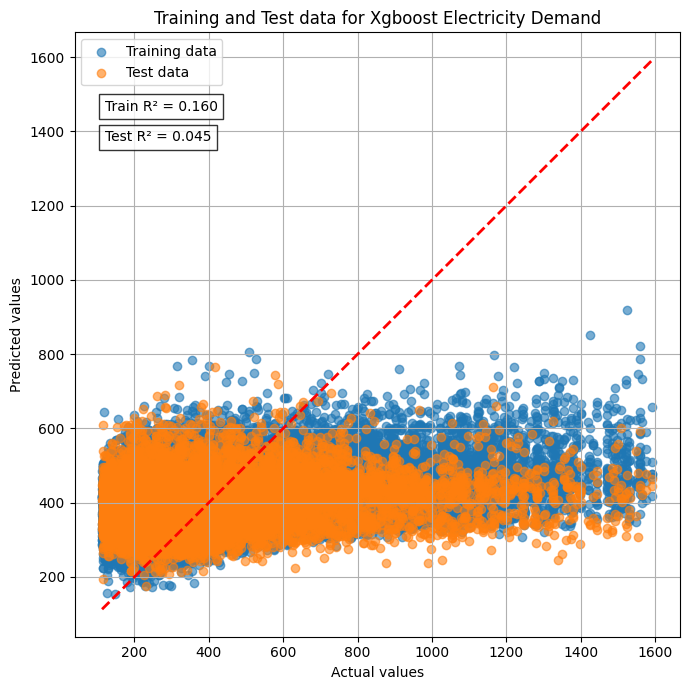

In [9]:
# lightgbm_model.plot_electricity(y_train_pred, y_test_pred,train_r2,test_r2,save_path)
lightgbm_model.plot_electricity(y_train_electricity,y_train_pred,y_test_electricity, y_test_pred,train_r2,test_r2,save_path)

In [10]:
heat_lgb = traine.fit(
    X_train_heat, y_train_heat)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001526 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 758
[LightGBM] [Info] Number of data points in the train set: 56064, number of used features: 6
[LightGBM] [Info] Start training from score 264.334885
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

In [11]:
heat_metrics = lightgbm_model.evaluate_lightgbm(
    heat_lgb,                   # ← model
    X_train_heat,
    y_train_heat,
    X_test_heat,
    y_test_heat
)


In [12]:
train_r2_heat = heat_metrics['train_r2']
train_mse_heat = heat_metrics['train_mse']
test_r2_heat = heat_metrics['test_r2']
test_mse_heat = heat_metrics['test_mse']
y_train_pred_heat = heat_metrics['y_train_pred']
y_test_pred_heat = heat_metrics['y_test_pred']

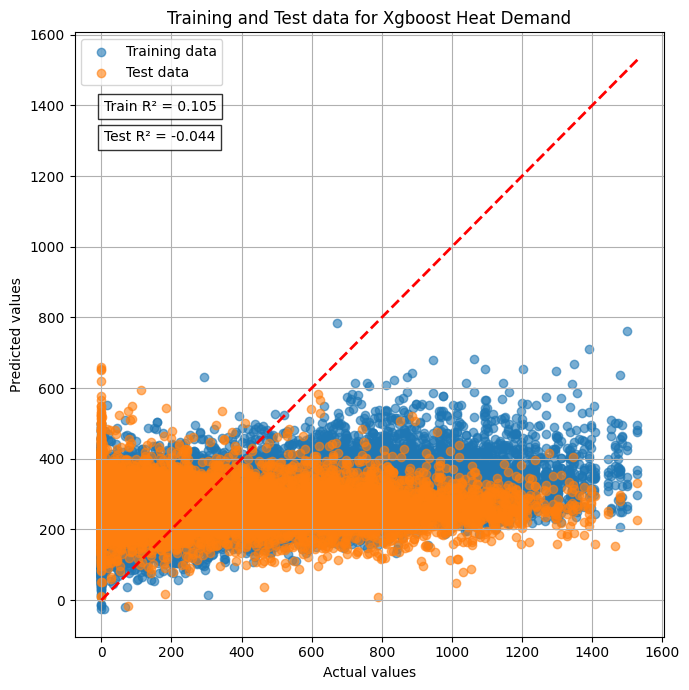

In [13]:
lightgbm_model.plot_heat(y_train_heat,y_train_pred_heat,y_test_heat, y_test_pred_heat,train_r2_heat,test_r2_heat,save_path)